## Aim of this notebook:  Exploratory Data Analysis (EDA)

#### My goal is simple and clear: I'd like to explore the given data and try to understand it better.

#### The analyzed data in this notebook is retrieved from the open database of the Taiwanese government: http://data.gov.tw/node/38320


In [1]:
library("ggplot2")
library("sqldf")

Loading required package: gsubfn
Loading required package: proto
Could not load tcltk.  Will use slower R code instead.
Loading required package: RSQLite


In [2]:
data=read.csv("BANK_LOC_ALL_AG.csv",sep=";",encoding='UTF-8')

Let's take a look of this table:

In [3]:
head(data,3)

年月,地區,食品餐飲類未滿20.筆數.,食品餐飲類未滿20.金額.新台幣.,衣著飾品類未滿20.筆數.,衣著飾品類未滿20.金額.新台幣.,旅館住宿類未滿20.筆數.,旅館住宿類未滿20.金額.新台幣.,交通類未滿20.筆數.,交通類未滿20.金額.新台幣.,⋯,旅館住宿類80.含.以上.筆數.,旅館住宿類80.含.以上.金額.新台幣.,交通類80.含.以上.筆數.,交通類80.含.以上.金額.新台幣.,文教康樂類80.含.以上.筆數.,文教康樂類80.含.以上.金額.新台幣.,百貨類80.含.以上.筆數.,百貨類80.含.以上.金額.新台幣.,其他類80.含.以上.筆數.,其他類80.含.以上.金額.新台幣.
105年04月,基隆市,82,62383,46,99368,24,43292,80,31904,⋯,16,155925,42,19852,19,55310,9,32820,19,87769
105年05月,基隆市,90,94772,48,116160,32,114704,110,84820,⋯,17,174539,50,33233,16,110448,9,40500,29,92074
105年06月,基隆市,71,68798,36,60694,20,43683,99,170113,⋯,13,77867,42,39710,12,136384,3,2122,28,627815


Let's take a look of the names of the cities covered in this table:

In [4]:
unique( data$地區 )

[1] 基隆市 新竹市 新竹縣 苗栗縣 彰化縣 南投縣 雲林縣 嘉義市 嘉義縣 屏東縣
[11] 宜蘭縣 花蓮縣 台東縣 澎湖縣 金門縣 連江縣
16 Levels: 南投縣 台東縣 嘉義市 嘉義縣 基隆市 宜蘭縣 屏東縣 彰化縣 ... 雲林縣

Wierdly, that the Taipei city is not included.

In [5]:
data$年月

[1] 105年04月 105年05月 105年06月 105年07月 105年08月 105年09月 105年04月
 [8] 105年05月 105年06月 105年07月 105年08月 105年09月 105年04月 105年05月
[15] 105年06月 105年07月 105年08月 105年09月 105年04月 105年05月 105年06月
[22] 105年07月 105年08月 105年09月 105年04月 105年05月 105年06月 105年07月
[29] 105年08月 105年09月 105年04月 105年05月 105年06月 105年07月 105年08月
[36] 105年09月 105年04月 105年05月 105年06月 105年07月 105年08月 105年09月
[43] 105年04月 105年05月 105年06月 105年07月 105年08月 105年09月 105年04月
[50] 105年05月 105年06月 105年07月 105年08月 105年09月 105年04月 105年05月
[57] 105年06月 105年07月 105年08月 105年09月 105年04月 105年05月 105年06月
[64] 105年07月 105年08月 105年09月 105年04月 105年05月 105年06月 105年07月
[71] 105年08月 105年09月 105年04月 105年05月 105年06月 105年07月 105年08月
[78] 105年09月 105年04月 105年05月 105年06月 105年07月 105年08月 105年09月
[85] 105年04月 105年05月 105年06月 105年07月 105年08月 105年09月 105年04月
[92] 105年05月 105年06月 105年07月 105年08月 105年09月
Levels: 105年04月 105年05月 105年06月 105年07月 105年08月 105年09月

From the above, we see that the data is gathered within the period of 04/2016 - 09/2016.

Now, let's see the column names of our data:

In [6]:
colnames(data)
cnames=colnames(data)
length(cnames)

[1] "年月"                              "地區"                             
  [3] "食品餐飲類未滿20.筆數."            "食品餐飲類未滿20.金額.新台幣."    
  [5] "衣著飾品類未滿20.筆數."            "衣著飾品類未滿20.金額.新台幣."    
  [7] "旅館住宿類未滿20.筆數."            "旅館住宿類未滿20.金額.新台幣."    
  [9] "交通類未滿20.筆數."                "交通類未滿20.金額.新台幣."        
 [11] "文教康樂類未滿20.筆數."            "文教康樂類未滿20.金額.新台幣."    
 [13] "百貨類未滿20.筆數."                "百貨類未滿20.金額.新台幣."        
 [15] "其他類未滿20.筆數."                "其他類未滿20.金額.新台幣."        
 [17] "食品餐飲類20.含..25.筆數."         "食品餐飲類20.含..25.金額.新台幣." 
 [19] "衣著飾品類20.含..25.筆數."         "衣著飾品類20.含..25.金額.新台幣." 
 [21] "旅館住宿類20.含..25.筆數."         "旅館住宿類20.含..25.金額.新台幣." 
 [23] "交通類20.含..25.筆數."             "交通類20.含..25.金額.新台幣."     
 [25] "文教康樂類20.含..25.筆數."         "文教康樂類20.含..25.金額.新台幣." 
 [27] "百貨類20.含..25.筆數."             "百貨類20.含..25.金額.新台幣."     
 [29] "其他類20.含..25.筆數."             "其他類20.含..25.金額.新台幣."     
 [31] "食品餐飲類25.含..30.筆數."         "食品餐飲類25.含..30.金額.新台幣." 
 [33] "衣著飾品類25.含..30.筆數."         "衣著飾品類25.含..30.金額.新台幣." 
 [35] "旅館住宿類25.含..30.筆數."         "旅館住宿類25.含..30.金額.新台幣." 
 [37] "交通類25.含..30.筆數."             "交通類25.含..30.金額.新台幣."     
 [39] "文教康樂類25.含..30.筆數."         "文教康樂類25.含..30.金額.新台幣." 
 [41] "百貨類25.含..30.筆數."             "百貨類25.含..30.金額.新台幣."     
 [43] "其他類25.含..30.筆數."             "其他類25.含..30.金額.新台幣."     
 [45] "食品餐飲類30.含..35.筆數."         "食品餐飲類30.含..35.金額.新台幣." 
 [47] "衣著飾品類30.含..35.筆數."         "衣著飾品類30.含..35.金額.新台幣." 
 [49] "旅館住宿類30.含..35.筆數."         "旅館住宿類30.含..35.金額.新台幣." 
 [51] "交通類30.含..35.筆數."             "交通類30.含..35.金額.新台幣."     
 [53] "文教康樂類30.含..35.筆數."         "文教康樂類30.含..35.金額.新台幣." 
 [55] "百貨類30.含..35.筆數."             "百貨類30.含..35.金額.新台幣."     
 [57] "其他類30.含..35.筆數."             "其他類30.含..35.金額.新台幣."     
 [59] "食品餐飲類35.含..40.筆數."         "食品餐飲類35.含..40.金額.新台幣." 
 [61] "衣著飾品類35.含..40.筆數."         "衣著飾品類35.含..40.金額.新台幣." 
 [63] "旅館住宿類35.含..40.筆數."         "旅館住宿類35.含..40.金額.新台幣." 
 [65] "交通類35.含..40.筆數."             "交通類35.含..40.金額.新台幣."     
 [67] "文教康樂類35.含..40.筆數."         "文教康樂類35.含..40.金額.新台幣." 
 [69] "百貨類35.含..40.筆數."             "百貨類35.含..40.金額.新台幣."     
 [71] "其他類35.含..40.筆數."             "其他類35.含..40.金額.新台幣."     
 [73] "食品餐飲類40.含..45.筆數."         "食品餐飲類40.含..45.金額.新台幣." 
 [75] "衣著飾品類40.含..45.筆數."         "衣著飾品類40.含..45.金額.新台幣." 
 [77] "旅館住宿類40.含..45.筆數."         "旅館住宿類40.含..45.金額.新台幣." 
 [79] "交通類40.含..45.筆數."             "交通類40.含..45.金額.新台幣."     
 [81] "文教康樂類40.含..45.筆數."         "文教康樂類40.含..45.金額.新台幣." 
 [83] "百貨類40.含..45.筆數."             "百貨類40.含..45.金額.新台幣."     
 [85] "其他類40.含..45.筆數."             "其他類40.含..45.金額.新台幣."     
 [87] "食品餐飲類45.含..50.筆數."         "食品餐飲類45.含..50.金額.新台幣." 
 [89] "衣著飾品類45.含..50.筆數."         "衣著飾品類45.含..50.金額.新台幣." 
 [91] "旅館住宿類45.含..50.筆數."         "旅館住宿類45.含..50.金額.新台幣." 
 [93] "交通類45.含..50.筆數."             "交通類45.含..50.金額.新台幣."     
 [95] "文教康樂類45.含..50.筆數."         "文教康樂類45.含..50.金額.新台幣." 
 [97] "百貨類45.含..50.筆數."             "百貨類45.含..50.金額.新台幣."     
 [99] "其他類45.含..50.筆數."             "其他類45.含..50.金額.新台幣."     
[101] "食品餐飲類50.含..55.筆數."         "食品餐飲類50.含..55.金額.新台幣." 
[103] "衣著飾品類50.含..55.筆數."         "衣著飾品類50.含..55.金額.新台幣." 
[105] "旅館住宿類50.含..55.筆數."         "旅館住宿類50.含..55.金額.新台幣." 
[107] "交通類50.含..55.筆數."             "交通類50.含..55.金額.新台幣."     
[109] "文教康樂類50.含..55.筆數."         "文教康樂類50.含..55.金額.新台幣." 
[111] "百貨類50.含..55.筆數."             "百貨類50.含..55.金額.新台幣."     
[113] "其他類50.含..55.筆數."             "其他類50.含..55.金額.新台幣."     
[115] "食品餐飲類55.含..60.筆數."         "食品餐飲類55.含..60.金額.新台幣." 
[117] "衣著飾品類55.含..60.筆數."         "衣著飾品類55.含..60.金額.新台幣." 
[119] "旅館住宿類55.含..60.筆數."         "旅館住宿類55.含..60.金額.新台幣." 
[121] "交通類55.含..60.筆數."             "交通類55.含..60.金額.新台幣."     
[123] "文教康樂類55.含..60.筆數."         "文教康樂類55.含..60.金額.新台幣." 
[125] "百貨類55.含..60.筆數."             "百貨類55.含..60.金額.新台幣."     
[127] "其他類55.含..60.筆數."             "其他類55.含..60.金額.新台幣."     
[129] "食品餐飲類60.含..65.筆數."         "食品餐飲類60.含..65.金額.新台幣." 
[131] "衣著飾品類60.含..65.筆數."         "衣著飾品類60.含..65.金額.新台幣." 

[1] 198

The above header looks horrible. There are 198 columns! It looks like a joined table. Anyway, all the information we need are within this one. So, Let's try to retrieve the information we want. (Although it is possible that this table can be split. But I am lazy to evaluate whether to do this step at this moment)

In [89]:
dat=read.csv("BANK_LOC_ALL_AG_header_removed.csv",sep=";",header=FALSE,encoding='UTF-8')

In [90]:
head(dat,5)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198
105年04月,基隆市,82,62383,46,99368,24,43292,80,31904,⋯,16,155925,42,19852,19,55310,9,32820,19,87769
105年05月,基隆市,90,94772,48,116160,32,114704,110,84820,⋯,17,174539,50,33233,16,110448,9,40500,29,92074
105年06月,基隆市,71,68798,36,60694,20,43683,99,170113,⋯,13,77867,42,39710,12,136384,3,2122,28,627815
105年07月,基隆市,109,87224,52,84247,41,149795,114,175180,⋯,27,306892,112,136015,42,692083,25,82396,121,1459189
105年08月,基隆市,88,75141,38,57216,32,114794,118,66635,⋯,40,428007,112,127453,42,255765,28,42738,89,687945


Let's do a SQL query: age under 30, different cities, # times paid by the credit card,amount of money(NTD) (in 6 months:2016-04 to 2016-09)

In [91]:
cnames[3:44]

[1] "食品餐飲類未滿20.筆數."           "食品餐飲類未滿20.金額.新台幣."   
 [3] "衣著飾品類未滿20.筆數."           "衣著飾品類未滿20.金額.新台幣."   
 [5] "旅館住宿類未滿20.筆數."           "旅館住宿類未滿20.金額.新台幣."   
 [7] "交通類未滿20.筆數."               "交通類未滿20.金額.新台幣."       
 [9] "文教康樂類未滿20.筆數."           "文教康樂類未滿20.金額.新台幣."   
[11] "百貨類未滿20.筆數."               "百貨類未滿20.金額.新台幣."       
[13] "其他類未滿20.筆數."               "其他類未滿20.金額.新台幣."       
[15] "食品餐飲類20.含..25.筆數."        "食品餐飲類20.含..25.金額.新台幣."
[17] "衣著飾品類20.含..25.筆數."        "衣著飾品類20.含..25.金額.新台幣."
[19] "旅館住宿類20.含..25.筆數."        "旅館住宿類20.含..25.金額.新台幣."
[21] "交通類20.含..25.筆數."            "交通類20.含..25.金額.新台幣."    
[23] "文教康樂類20.含..25.筆數."        "文教康樂類20.含..25.金額.新台幣."
[25] "百貨類20.含..25.筆數."            "百貨類20.含..25.金額.新台幣."    
[27] "其他類20.含..25.筆數."            "其他類20.含..25.金額.新台幣."    
[29] "食品餐飲類25.含..30.筆數."        "食品餐飲類25.含..30.金額.新台幣."
[31] "衣著飾品類25.含..30.筆數."        "衣著飾品類25.含..30.金額.新台幣."
[33] "旅館住宿類25.含..30.筆數."        "旅館住宿類25.含..30.金額.新台幣."
[35] "交通類25.含..30.筆數."            "交通類25.含..30.金額.新台幣."    
[37] "文教康樂類25.含..30.筆數."        "文教康樂類25.含..30.金額.新台幣."
[39] "百貨類25.含..30.筆數."            "百貨類25.含..30.金額.新台幣."    
[41] "其他類25.含..30.筆數."            "其他類25.含..30.金額.新台幣."

In [92]:
datAgeUnder30=sqldf("select V1 as 'date',V2 as 'city',V3+V5+V7+V9+V11+V13+V15+V17+V19+V21+V23+V25+V27+V29+V31+V33+V35+V37+V39+V41+V43 as 'NumPays', V4+V6+V8+V10+V12+V14+V16+V18+V20+V22+V24+V26+V28+V30+V32+V34+V36+V38+V40+V42+V44 as 'amount' from dat")

In [93]:
head(datAgeUnder30,12)

date,city,NumPays,amount
105年04月,基隆市,25376,55262799
105年05月,基隆市,26951,59146515
105年06月,基隆市,23003,45772641
105年07月,基隆市,30439,57055912
105年08月,基隆市,29012,47380037
105年09月,基隆市,27213,47008045
105年04月,新竹市,141516,281722016
105年05月,新竹市,149901,283952299
105年06月,新竹市,110766,195329575
105年07月,新竹市,157606,277025293


The above table is independent of category of consumption and is generated from people with age <30.

I have wierd Chinese issues on my Mac. I tried utf-8 encoding but still in vain.

In order to solve this temporarily, let's translate the above table into English. (hard work & stupid)

In [94]:
datAgeUnder30$date[ datAgeUnder30$date=="105年04月" ] = "10504"
datAgeUnder30$date[ datAgeUnder30$date=="105年05月" ] = "10505"
datAgeUnder30$date[ datAgeUnder30$date=="105年06月" ] = "10506"
datAgeUnder30$date[ datAgeUnder30$date=="105年07月" ] = "10507"
datAgeUnder30$date[ datAgeUnder30$date=="105年08月" ] = "10508"
datAgeUnder30$date[ datAgeUnder30$date=="105年09月" ] = "10509"

In [96]:
unique(datAgeUnder30$city)

[1] "基隆市" "新竹市" "新竹縣" "苗栗縣" "彰化縣" "南投縣" "雲林縣" "嘉義市"
 [9] "嘉義縣" "屏東縣" "宜蘭縣" "花蓮縣" "台東縣" "澎湖縣" "金門縣" "連江縣"

In [97]:
datAgeUnder30$city[ datAgeUnder30$city=="基隆市" ] = "KeelungCty"
datAgeUnder30$city[ datAgeUnder30$city=="新竹市" ] = "HsingzuCty"
datAgeUnder30$city[ datAgeUnder30$city=="新竹縣" ] = "HsingzuCny"
datAgeUnder30$city[ datAgeUnder30$city=="苗栗縣" ] = "MiaoliCny"
datAgeUnder30$city[ datAgeUnder30$city=="彰化縣" ] = "ChanghwaCny"
datAgeUnder30$city[ datAgeUnder30$city=="南投縣" ] = "NantouCny"
datAgeUnder30$city[ datAgeUnder30$city=="雲林縣" ] = "YunlinCny"
datAgeUnder30$city[ datAgeUnder30$city=="嘉義市" ] = "ChiayiCty"
datAgeUnder30$city[ datAgeUnder30$city=="嘉義縣" ] = "ChiayiCny"
datAgeUnder30$city[ datAgeUnder30$city=="屏東縣" ] = "PingTongCny"
datAgeUnder30$city[ datAgeUnder30$city=="宜蘭縣" ] = "YeelanCny"
datAgeUnder30$city[ datAgeUnder30$city=="花蓮縣" ] = "HwalianCny"
datAgeUnder30$city[ datAgeUnder30$city=="台東縣" ] = "TaitungCny"
datAgeUnder30$city[ datAgeUnder30$city=="澎湖縣" ] = "PenghuCny"
datAgeUnder30$city[ datAgeUnder30$city=="金門縣" ] = "KingmenCny"
datAgeUnder30$city[ datAgeUnder30$city=="連江縣" ] = "LianchiangCny"

Warning message:
“Removed 2 rows containing missing values (geom_point).”

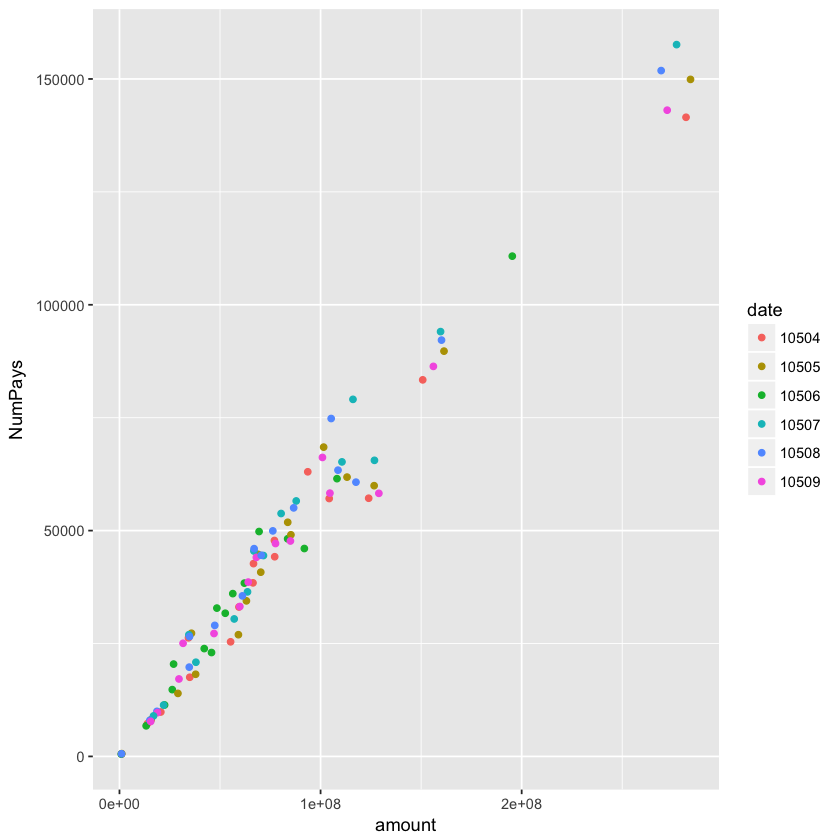

In [99]:
ggplot ( datAgeUnder30 , aes ( x = amount , y = NumPays,colour=date  )) + geom_point ()

Number of times paid by the credit card is in general proportional to the amount of money paid by the credit card, in a linear way.

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

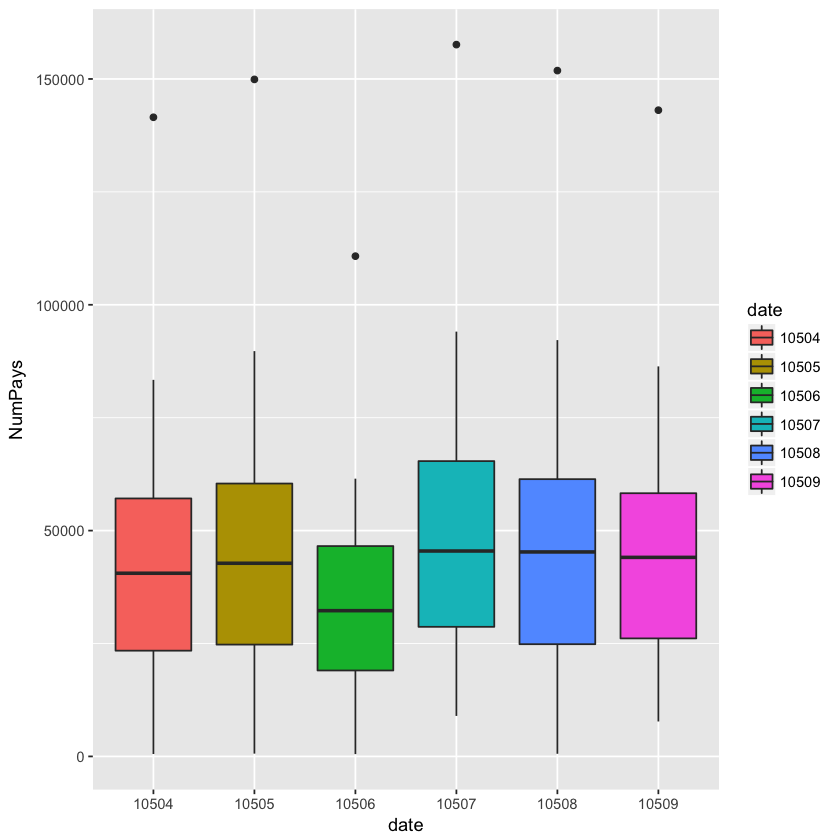

In [115]:
ggplot ( datAgeUnder30 , aes ( x = date , y = NumPays , fill = date )) + geom_boxplot ()

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

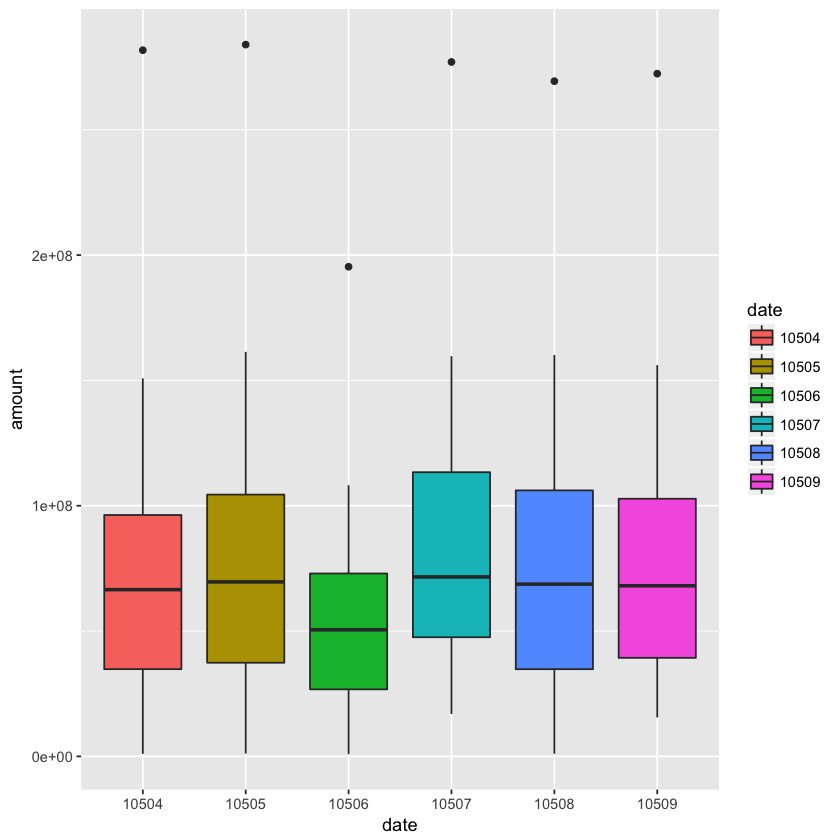

In [116]:
ggplot ( datAgeUnder30 , aes ( x = date , y = amount , fill = date )) + geom_boxplot ()

The total amount money paid by credit card is slighly skewed on July. 

Do wealthy people buy more on July?

Now, let us sum over 6 months and get the table: 

(city, total amount of times paid by the credit card, total amount of money paid by the credit card)

in ascending order.

In [125]:
datAgeUnder30GroupedbyCity=sqldf("select city, SUM(NumPays) as 'NumPays', SUM(amount) as 'amount' from datAgeUnder30 group by city order by NumPays")

In [127]:
dim(datAgeUnder30GroupedbyCity)

[1] 16  3

In [128]:
datAgeUnder30GroupedbyCity$index=c(1:16)

In [129]:
datAgeUnder30GroupedbyCity

city,NumPays,amount,index
LianchiangCny,2237,4052509,1
KingmenCny,46873,90524375,2
PenghuCny,66209,131528122,3
TaitungCny,108280,201366809,4
ChiayiCny,152517,197996828,5
KeelungCty,161994,311625949,6
NantouCny,196576,349334087,7
HwalianCny,238544,395362483,8
YunlinCny,255825,385900564,9
MiaoliCny,286560,451290225,10


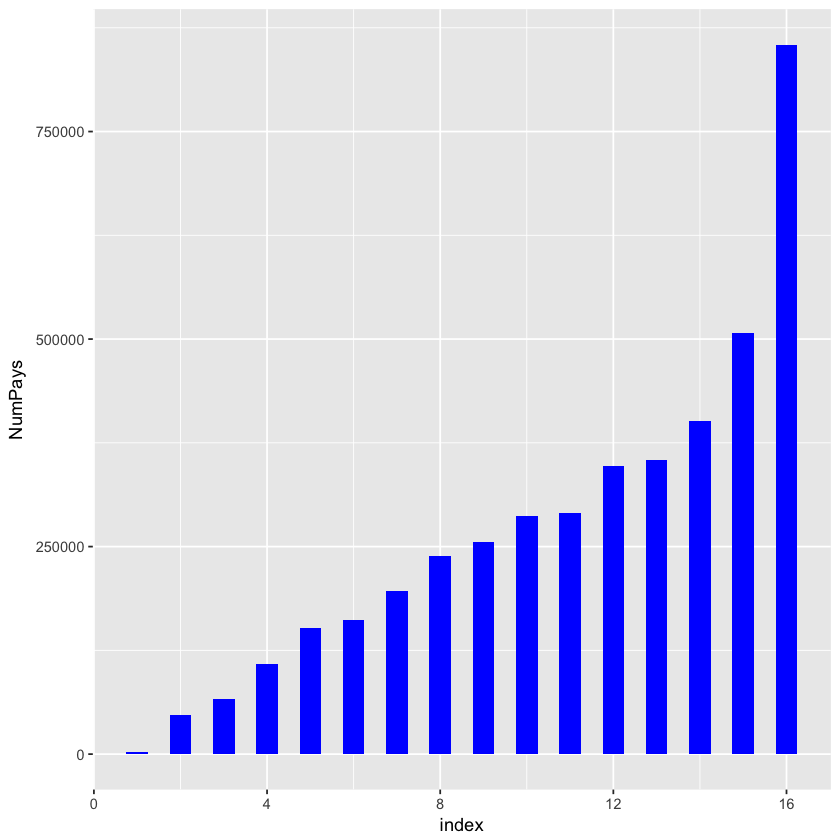

In [130]:
ggplot ( datAgeUnder30GroupedbyCity , aes ( x = index , y = NumPays ) ) + geom_bar(stat="identity",position="identity",width=0.5,fill="blue")

In [131]:
print(datAgeUnder30GroupedbyCity$city)

 [1] "LianchiangCny" "KingmenCny"    "PenghuCny"     "TaitungCny"   
 [5] "ChiayiCny"     "KeelungCty"    "NantouCny"     "HwalianCny"   
 [9] "YunlinCny"     "MiaoliCny"     "YeelanCny"     "ChiayiCty"    
[13] "PingTongCny"   "HsingzuCny"    "ChanghwaCny"   "HsingzuCty"   


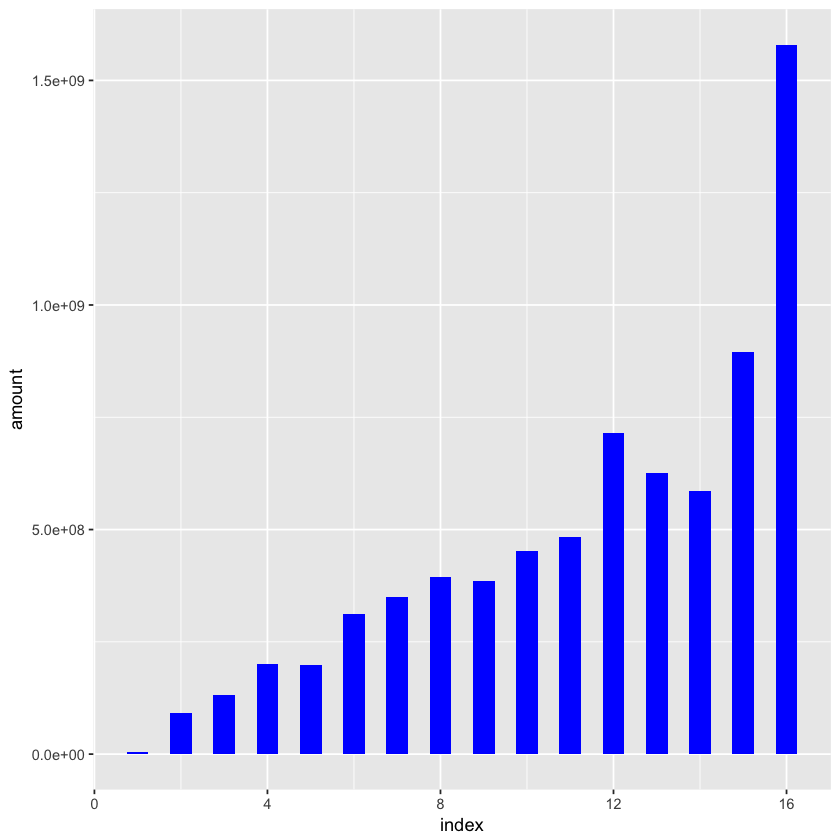

In [132]:
ggplot ( datAgeUnder30GroupedbyCity , aes ( x = index , y = amount ) ) + geom_bar(stat="identity",position="identity",width=0.5,fill="blue")

In [133]:
print(datAgeUnder30GroupedbyCity$city)

 [1] "LianchiangCny" "KingmenCny"    "PenghuCny"     "TaitungCny"   
 [5] "ChiayiCny"     "KeelungCty"    "NantouCny"     "HwalianCny"   
 [9] "YunlinCny"     "MiaoliCny"     "YeelanCny"     "ChiayiCty"    
[13] "PingTongCny"   "HsingzuCny"    "ChanghwaCny"   "HsingzuCty"   


----

#### TO DO

1. split the ugly table into two.
2. explore the variables: age and category of consumption.